In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load file


In [4]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Data Preprocessing


In [8]:
#check duplication
data.duplicated().sum()

0

In [9]:
#checking missing values
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


<Axes: >

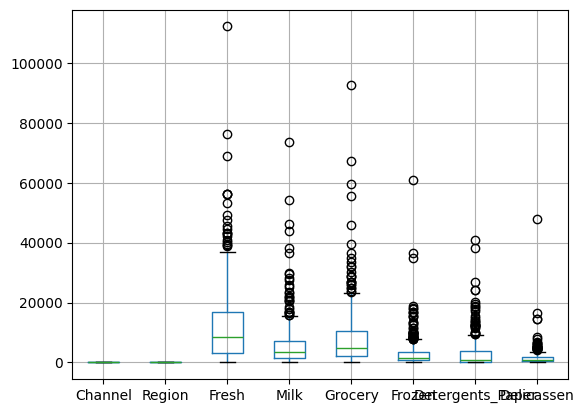

In [10]:
#outlier detection using boxplot
data.boxplot()

In [11]:
#removing very far upperbound outliers
data = data[data['Fresh']<60000]
data = data[data['Milk']<40000]
data = data[data['Grocery']<40000]
data = data[data['Frozen']<20000]
data = data[data['Detergents_Paper']<20000]
data = data[data['Delicassen']<20000]

<Axes: >

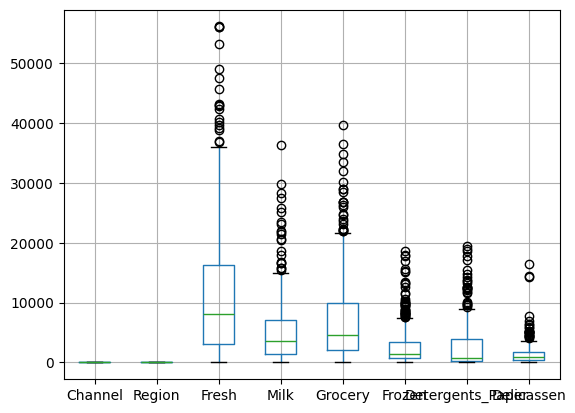

In [12]:
#boxplot after removing too far outliers
data.boxplot()

In [13]:
data.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [14]:
#no need of encoding because numerical data only in the given dataset


In [15]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

INPUT SELECTION


In [16]:
x = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [17]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


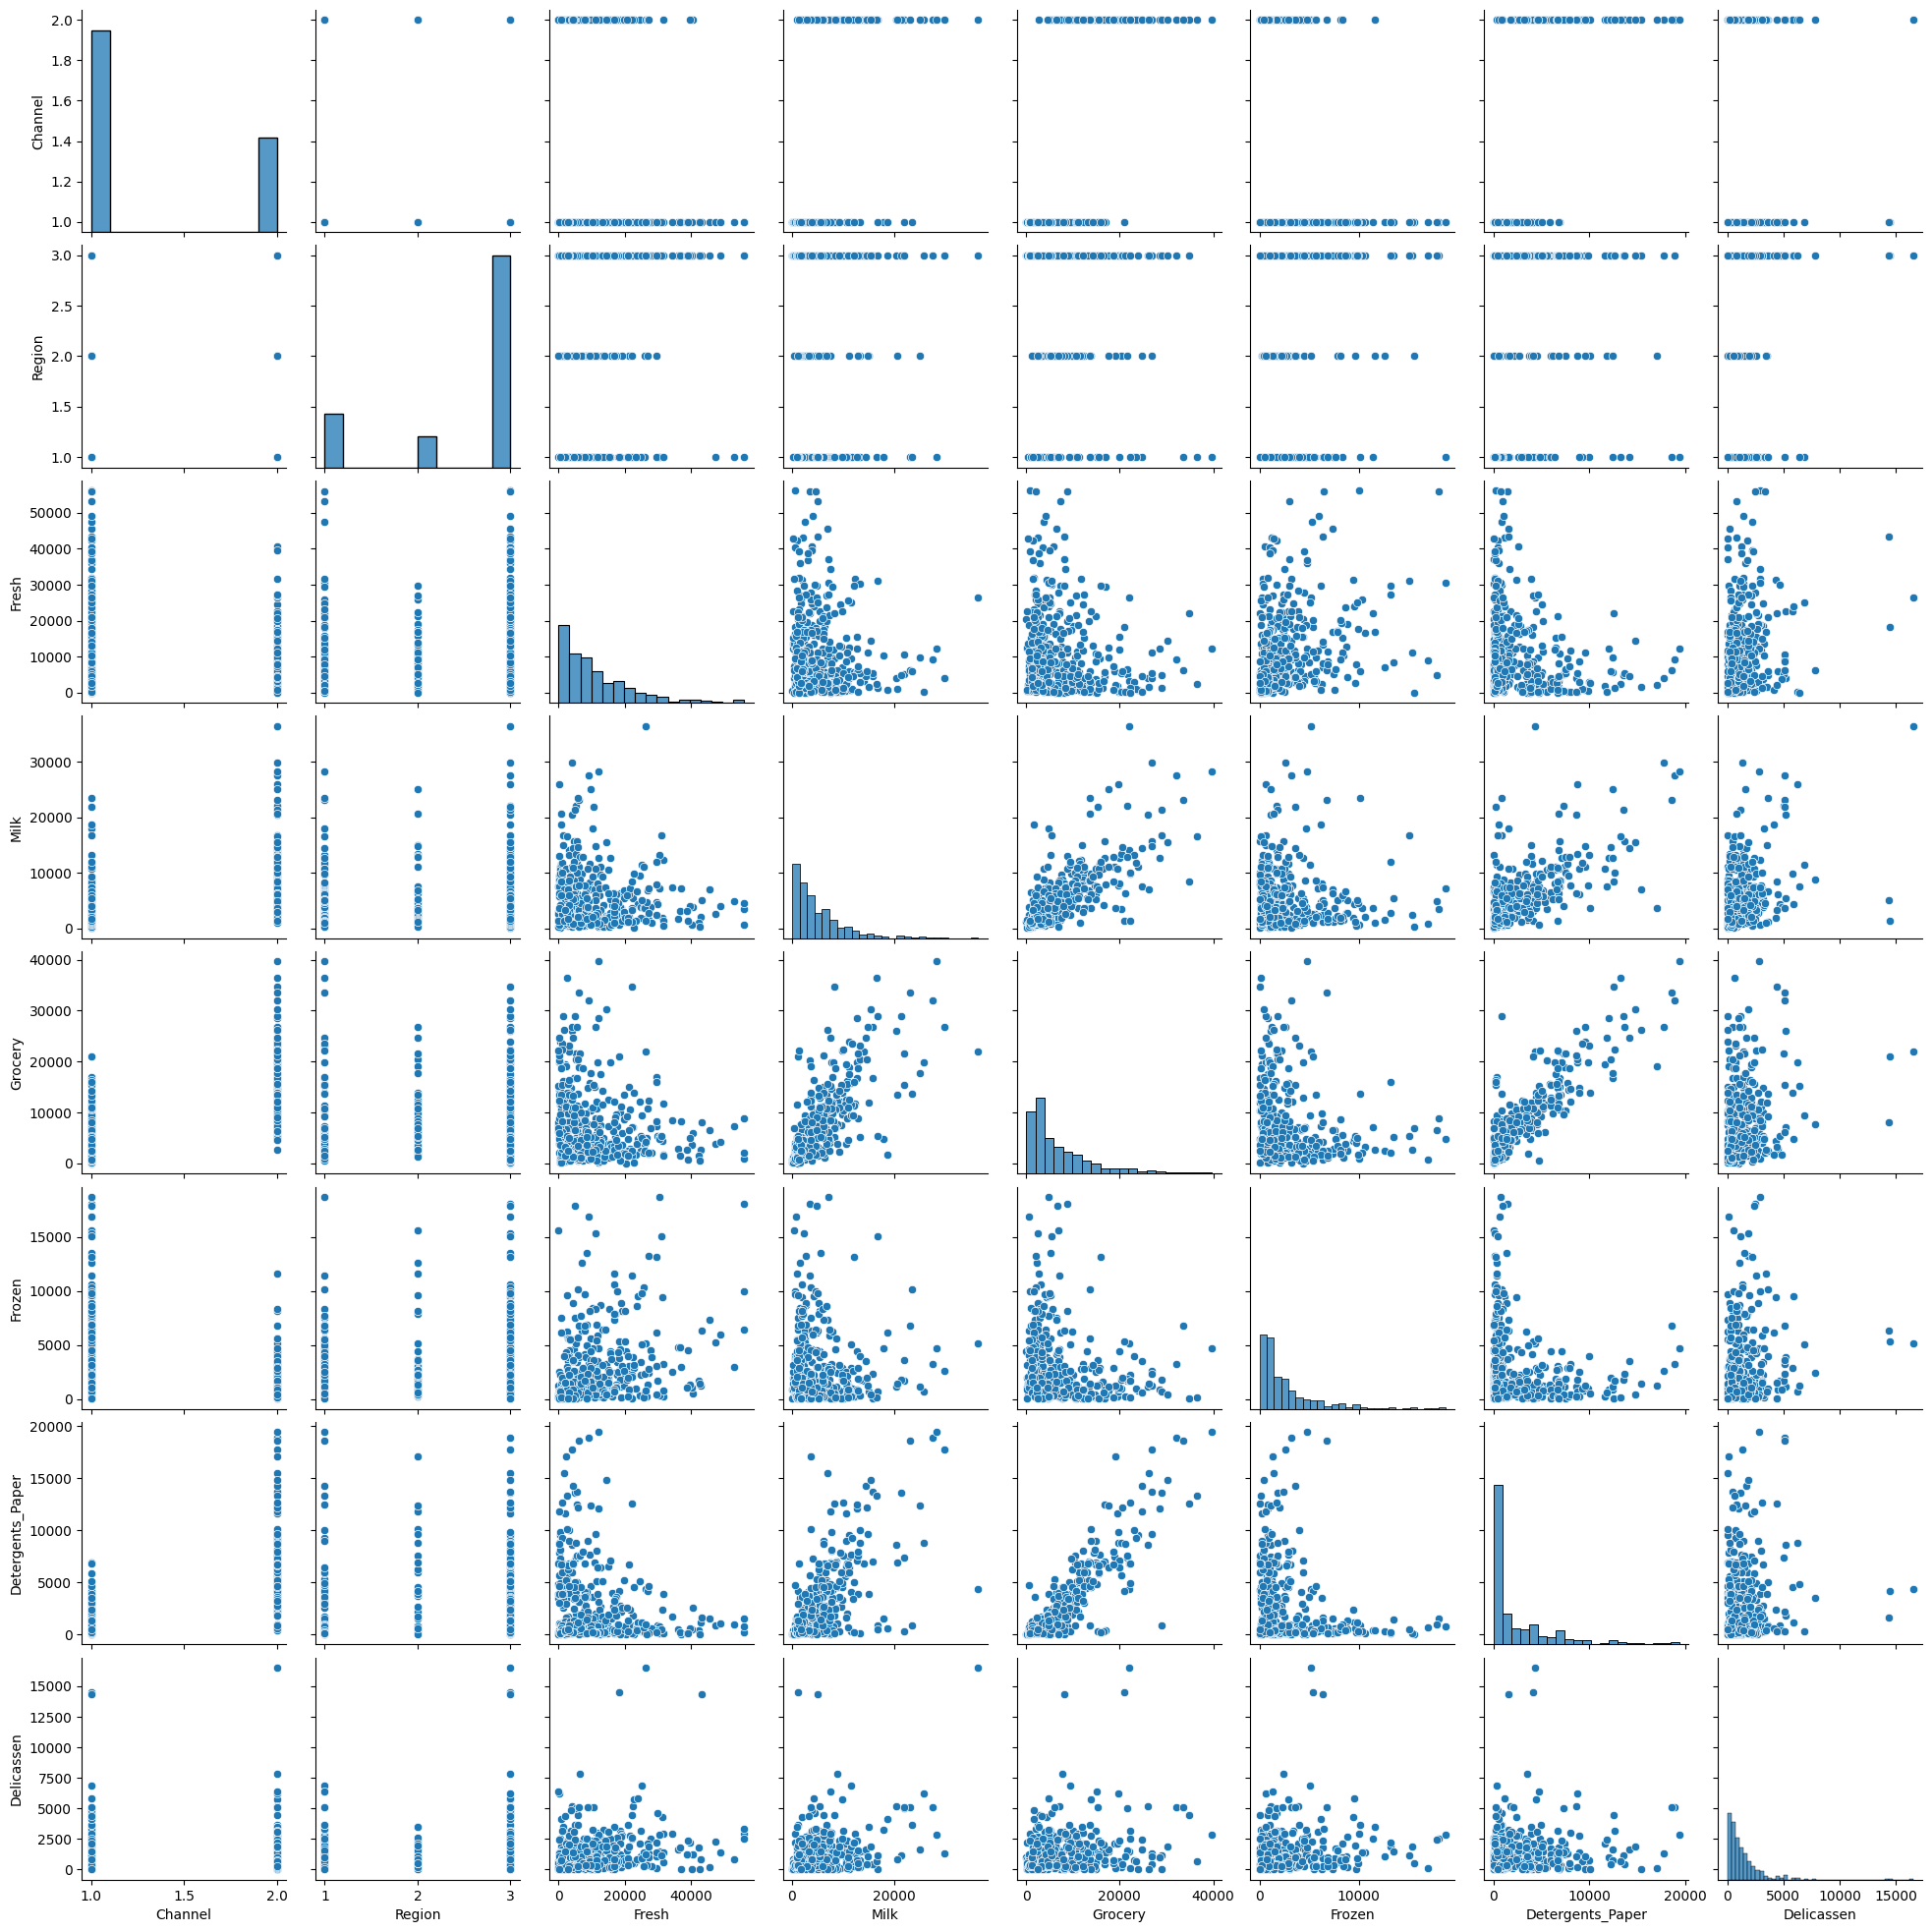

In [18]:
sns.pairplot(data)

In [19]:
data.corr()
#checking correlation

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.059395,-0.183314,0.556982,0.701991,-0.233245,0.721943,0.139728
Region,0.059395,1.000000,0.029234,-0.019676,-0.027228,-0.046853,-0.031412,0.029998
Fresh,-0.183314,0.029234,1.000000,-0.103730,-0.161912,0.304154,-0.236874,0.212022
Milk,0.556982,-0.019676,-0.103730,1.000000,0.748739,-0.031261,0.673848,0.374347
Grocery,0.701991,-0.027228,-0.161912,0.748739,1.000000,-0.140176,0.881682,0.265895
Frozen,-0.233245,-0.046853,0.304154,-0.031261,-0.140176,1.000000,-0.190335,0.165777
Detergents_Paper,0.721943,-0.031412,-0.236874,0.673848,0.881682,-0.190335,1.000000,0.138378
Delicassen,0.139728,0.029998,0.212022,0.374347,0.265895,0.165777,0.138378,1.000000


In [20]:
data.mean()

,0
Channel,1.317757
Region,2.535047
Fresh,11247.228972
Milk,5165.327103
Grocery,7176.766355
Frozen,2719.735981
Detergents_Paper,2536.672897
Delicassen,1373.485981


In [21]:
data.var()#checking varriance

,0
Channel,2.172952e-01
Region,6.100101e-01
Fresh,1.161903e+08
Milk,2.746374e+07
Grocery,5.005941e+07
Frozen,1.022136e+07
Detergents_Paper,1.275349e+07
Delicassen,2.883389e+06


**CLUSTERING** **MODELS**

1.KMEANS ALGORITHM


In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters = i,n_init=10)#init = 'k-means++'
  #specifies no of times the algorithm will run with different centroid
  km.fit(x)
  css = km.inertia_ #wcss score
  #evaluating how compact the clusters
  wcss.append(css)

In [24]:
wcss

[93757131425.94861,
 59797132604.48114,
 38589634881.23358,
 30438910922.76276,
 25311817328.654133,
 22237917039.305397,
 20222915464.031433,
 18767998819.93315,
 17409706699.745186,
 16395360268.563147]

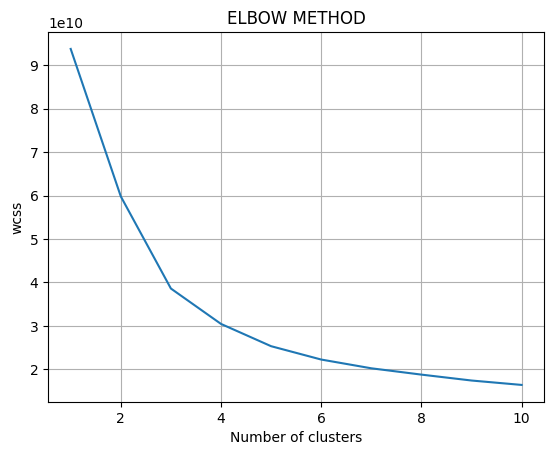

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.grid()
plt.title('ELBOW METHOD')
plt.show()
#visualise elbow point which indicates optimum number of clusters

In [26]:
km = KMeans(n_clusters=5, n_init =10)#selecting 5 clusters

In [27]:
km.fit(x)
#fitting to given dataset

KMeans(n_clusters=5, n_init=10)

In [28]:
cluster_labels=km.predict(x)
#computes distance to each cluster centroid

In [29]:
cluster_labels

array([2, 3, 3, 2, 2, 0, 2, 3, 0, 3, 3, 2, 1, 2, 2, 0, 3, 0, 2, 0, 2, 0,
       1, 4, 2, 2, 0, 2, 4, 1, 2, 0, 2, 1, 0, 3, 1, 3, 3, 1, 2, 2, 3, 4,
       3, 4, 4, 3, 4, 0, 0, 1, 3, 2, 0, 4, 3, 2, 3, 0, 0, 3, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 3, 2, 0, 4, 0, 0, 0, 3, 3, 2, 0, 1, 0, 2, 0, 2, 4,
       3, 0, 3, 0, 0, 0, 3, 3, 3, 1, 2, 2, 3, 3, 3, 4, 0, 3, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 3, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 3, 3, 2,
       0, 2, 1, 1, 0, 2, 4, 0, 0, 0, 1, 2, 0, 2, 0, 0, 3, 3, 2, 3, 3, 3,
       0, 2, 4, 3, 4, 3, 0, 0, 0, 3, 4, 0, 3, 0, 3, 1, 2, 0, 0, 2, 3, 0,
       0, 0, 3, 3, 3, 2, 2, 0, 3, 0, 2, 1, 3, 0, 0, 4, 4, 2, 0, 0, 4, 0,
       0, 0, 3, 2, 4, 0, 3, 3, 3, 4, 2, 3, 0, 2, 3, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 3, 3, 0, 2, 2, 0, 0,
       4, 0, 1, 3, 1, 0, 0, 1, 1, 0, 0, 2, 0, 3, 4, 3, 2, 3, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 0, 3, 2, 0,
       2, 0, 3, 0, 2, 4, 3, 3, 4, 3, 4, 2, 0, 3, 0,

In [30]:
pd.Series(cluster_labels).value_counts()
#count no of data points in each cluster

,count
0,171
2,105
3,88
1,32
4,32


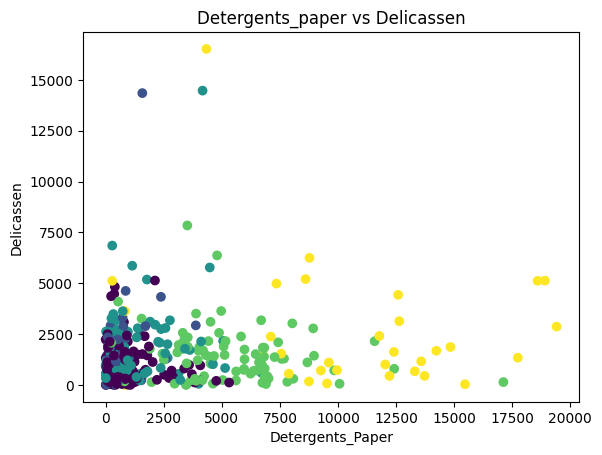

In [31]:
plt.scatter(x['Detergents_Paper'],x['Delicassen'],c=cluster_labels)
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title('Detergents_paper vs Delicassen')
plt.show()

In [32]:
cluster_indices = np.where(cluster_labels == 0)[0]

In [33]:
cluster_indices

array([  5,   8,  15,  17,  19,  21,  26,  31,  34,  49,  50,  54,  59,
        60,  62,  63,  65,  66,  69,  73,  75,  76,  77,  81,  83,  85,
        89,  91,  92,  93, 104, 109, 110, 111, 113, 115, 116, 121, 123,
       124, 126, 127, 128, 132, 136, 139, 140, 141, 144, 146, 147, 154,
       160, 161, 162, 165, 167, 171, 172, 175, 176, 177, 183, 185, 189,
       190, 194, 195, 197, 198, 199, 203, 210, 213, 214, 215, 218, 219,
       220, 221, 222, 224, 226, 227, 229, 234, 237, 240, 241, 243, 247,
       248, 251, 252, 254, 261, 262, 265, 266, 268, 269, 271, 276, 280,
       281, 282, 285, 287, 289, 298, 300, 303, 304, 306, 307, 308, 310,
       311, 315, 316, 318, 319, 325, 326, 327, 332, 336, 338, 340, 343,
       347, 349, 350, 351, 352, 354, 355, 357, 360, 362, 363, 366, 371,
       373, 374, 376, 377, 378, 379, 380, 382, 383, 385, 386, 387, 388,
       393, 396, 397, 398, 399, 401, 402, 407, 413, 416, 417, 419, 421,
       426, 427])

In [34]:
data['Cluster_labels']=cluster_labels

In [35]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2


In [36]:
target_cluster_data = data[data['Cluster_labels'] == 0]

In [37]:
target_cluster_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
5,2,3,9413,8259,5126,666,1795,1451,0
8,1,3,5963,3648,6192,425,1716,750,0
15,1,3,10253,1114,3821,397,964,412,0
17,1,3,5876,6157,2933,839,370,4478,0
19,1,3,7780,2495,9464,669,2518,501,0
...,...,...,...,...,...,...,...,...,...
429,1,3,8607,1750,3580,47,84,2501,0
431,1,3,8533,5506,5160,13486,1377,1498,0
433,1,3,1982,3218,1493,1541,356,1449,0
438,1,3,10290,1981,2232,1038,168,2125,0


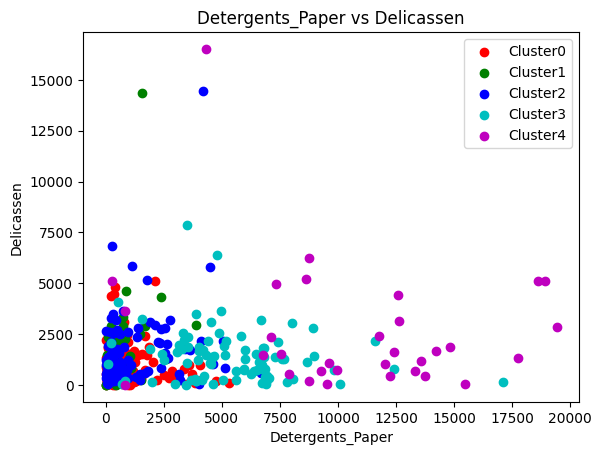

In [38]:
# Assuming you have assigned colors to each cluster
colors = ['r', 'g', 'b', 'c', 'm']  #  customizing the colors

for i in range(max(cluster_labels)+1):
  cluster_data = x[cluster_labels==i]
  plt.scatter(cluster_data['Detergents_Paper'],
              cluster_data['Delicassen'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title('Detergents_Paper vs Delicassen')
plt.legend()



In [39]:
# function to predict cluster for a new customer
def predict_cluster(Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen):
  new_data = [[Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]]
  cluster = km.predict(new_data)
  return cluster[0]

In [40]:
# example
Channel = 2
Region = 3
Fresh = 23410
Milk = 8642
Grocery = 7613
Frozen = 916
new_Detergents_Paper = 2300
new_Delicassen = 890
predicted_cluster = predict_cluster(Channel, Region, Fresh, Milk, Grocery, Frozen, new_Detergents_Paper, new_Delicassen)
print(f'The customer belongs to cluster: {predicted_cluster}')


The customer belongs to cluster: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2.**HIERARCHIAL** **CLUSTERING**


In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [42]:
mergings = linkage(x,method="ward") #ward,single,centroid

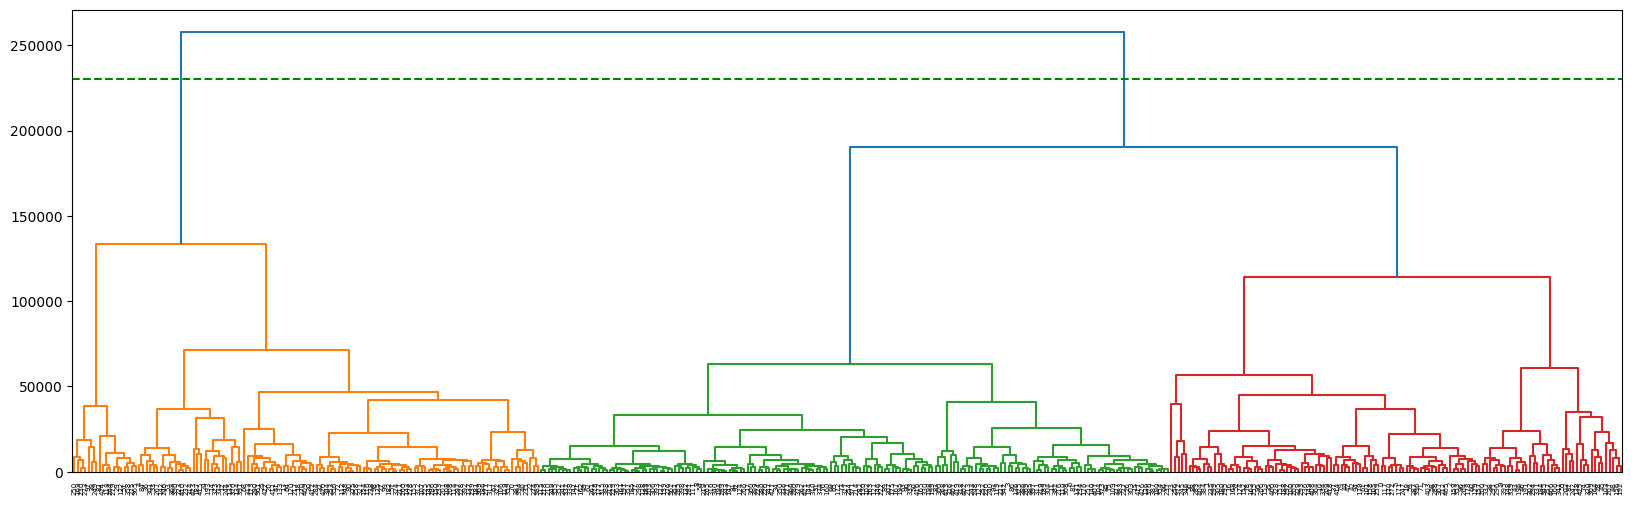

In [43]:
plt.figure(figsize=(20,6))
dendrogram(mergings)
plt.axhline(230000,color='green',linestyle='--')
plt.show()

In [44]:
cluster_labels = fcluster(mergings,230000,criterion="distance")

In [45]:
cluster_labels

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,

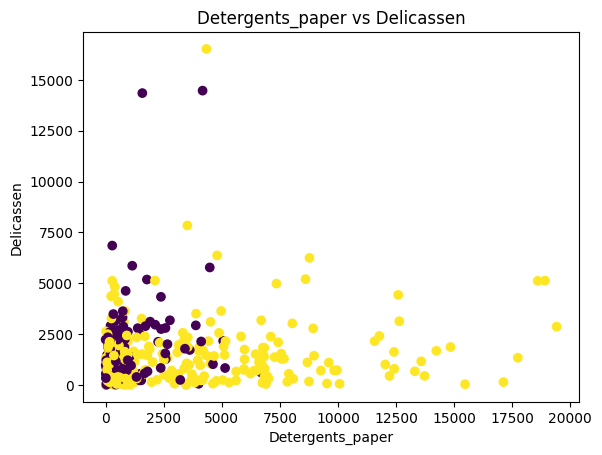

In [46]:
plt.scatter(x['Detergents_Paper'],x['Delicassen'],c=cluster_labels)
plt.xlabel('Detergents_paper')
plt.ylabel('Delicassen')
plt.title('Detergents_paper vs Delicassen')
plt.show()

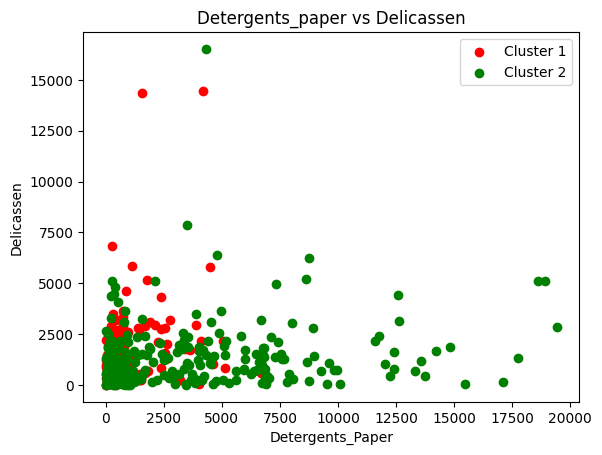

In [47]:
import matplotlib.pyplot as plt

# Assuming you have assigned colors to each cluster
colors = ['r','g', 'b']  # You can customize the colors

# Scatter plot for each cluster with a label
for cluster_num in range(1,max(cluster_labels)+1):
    cluster_data = x[cluster_labels == cluster_num]
    plt.scatter(cluster_data['Detergents_Paper'],
                cluster_data['Delicassen'],
                c=colors[cluster_num-1],
                label=f'Cluster {cluster_num}')

plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title('Detergents_paper vs Delicassen')

# Add a legend
plt.legend()

plt.show()


In [48]:
from sklearn.metrics import silhouette_score

In [49]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.36724684864206225


**DBSCAN** **CLUSTERING**

In [50]:
from sklearn.cluster import DBSCAN

In [115]:

# Use adjusted parameters
dbscan = DBSCAN(eps=2.5, min_samples=3)  # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(x)

print(f"Unique cluster labels: {set(cluster_labels)}")
print(f"Number of noise points: {(cluster_labels == -1).sum()}")


Unique cluster labels: {0, 1, -1}
Number of noise points: 15


In [116]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

# Apply DBSCAN on scaled data
dbscan = DBSCAN(eps=2.5, min_samples=3)
cluster_labels = dbscan.fit_predict(x_scaled)

print(f"Unique cluster labels: {set(cluster_labels)}")
print(f"Number of noise points: {(cluster_labels == -1).sum()}")


Unique cluster labels: {0, 1, -1}
Number of noise points: 15


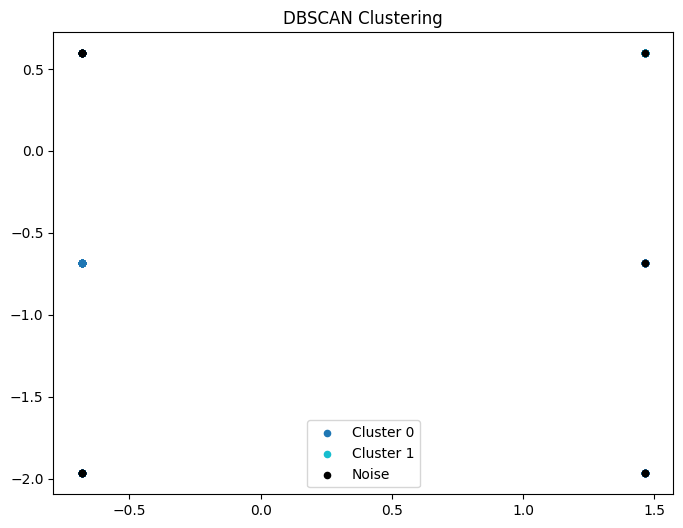

In [118]:
plt.figure(figsize=(8, 6))
unique_labels = set(cluster_labels)

for label in unique_labels:
    if label == -1:
        # Noise points
        color = "black"
        label_name = "Noise"
    else:
        # Assign color to each cluster
        color = plt.cm.tab10(label / max(unique_labels))
        label_name = f"Cluster {label}"

    plt.scatter(
        x_scaled[cluster_labels == label, 0],
        x_scaled[cluster_labels == label, 1],
        s=20,
        color=color,
        label=label_name
    )

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


In [54]:
#noisy components present more

**PCA**

In [55]:
from sklearn.decomposition import PCA

In [56]:
pc = PCA()

In [57]:
from sklearn.preprocessing import scale
scale(data)

array([[ 1.46528455,  0.59600342,  0.13205431, ...,  0.03849902,
        -0.02092248,  0.37545666],
       [ 1.46528455,  0.59600342, -0.3891891 , ...,  0.21203283,
         0.23732165,  1.09931003],
       [ 1.46528455,  0.59600342, -0.45457673, ...,  0.27454985,
         3.8150052 ,  1.09931003],
       ...,
       [ 1.46528455,  0.59600342,  0.30499715, ...,  3.44946158,
         0.29097511,  1.82316341],
       [-0.6824613 ,  0.59600342, -0.08890757, ..., -0.66404657,
         0.44309152, -1.07225009],
       [-0.6824613 ,  0.59600342, -0.78578735, ..., -0.57741983,
        -0.77914612, -1.07225009]])

In [58]:
x = pd.DataFrame(scale(data),index = data.index,columns = data.columns)

In [59]:
pc_array = pc.fit_transform(x)

In [60]:
pc_array = pd.DataFrame(pc_array,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [61]:
pc_array

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.236580,-0.350059,0.825646,0.280994,-0.432432,0.371823,0.038929,1.130443,-0.016936
1,1.806897,-0.177002,0.701148,-0.011937,0.026449,0.375598,0.672542,0.757008,0.013828
2,2.175954,1.776971,0.961879,-2.326773,-1.312170,1.409699,0.944190,0.105243,-0.450656
3,-1.003544,0.918055,0.455231,-0.017647,0.674654,0.059879,0.781031,-0.578192,0.033034
4,0.896131,1.946014,0.960424,-0.472118,-0.882148,1.515318,0.196071,0.384276,0.008325
...,...,...,...,...,...,...,...,...,...
423,-0.040520,3.420345,0.055799,0.214550,2.001344,-0.824815,-0.744483,0.366658,1.169957
424,-1.699741,2.112353,0.853324,1.123613,-0.769973,0.083802,-0.345979,-0.093923,-0.266395
425,5.401332,0.042430,0.474803,0.785794,0.159829,-0.646008,-1.216538,-1.006003,-0.044808
426,-1.485353,-0.196080,0.703213,-0.747582,-0.572639,0.030039,-0.345575,-0.078496,-0.019426


In [62]:
pc_array.shape

(428, 9)

In [63]:
pc_array.corr().round()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
PC2,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
PC3,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,0.0
PC4,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0
PC5,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0
PC6,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0
PC7,0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0
PC8,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,0.0
PC9,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0


In [64]:
pc.explained_variance_

array([3.96573507, 1.52458221, 1.02736295, 0.73077642, 0.71655664,
       0.37860629, 0.30278987, 0.27200593, 0.10266192])

In [65]:
pc.explained_variance_ratio_*100

array([43.96077033, 16.90022333, 11.38847304,  8.1007666 ,  7.94313821,
        4.19690774,  3.35647128,  3.01522666,  1.13802281])

In [66]:
pc1 = PCA(n_components=5)

In [67]:
pc_array1 = pc1.fit_transform(x)

In [68]:
pc_data1 = pd.DataFrame(pc_array1,columns = ['PC1','PC2','PC3','PC4','PC5'])

In [69]:
pc_data1

,PC1,PC2,PC3,PC4,PC5
0,1.236580,-0.350059,0.825646,0.280994,-0.432432
1,1.806897,-0.177002,0.701148,-0.011937,0.026449
2,2.175954,1.776971,0.961879,-2.326773,-1.312170
3,-1.003544,0.918055,0.455231,-0.017647,0.674654
4,0.896131,1.946014,0.960424,-0.472118,-0.882148
...,...,...,...,...,...
423,-0.040520,3.420345,0.055799,0.214550,2.001344
424,-1.699741,2.112353,0.853324,1.123613,-0.769973
425,5.401332,0.042430,0.474803,0.785794,0.159829
426,-1.485353,-0.196080,0.703213,-0.747582,-0.572639


In [70]:
pc1.explained_variance_

array([3.96573507, 1.52458221, 1.02736295, 0.73077642, 0.71655664])

In [71]:
pc1.explained_variance_ratio_*100

array([43.96077033, 16.90022333, 11.38847304,  8.1007666 ,  7.94313821])

In [72]:
#dimension reduced into 5.after reduced dimension performing different clustering models.

APPLYING DIFFERENT CLUSTERING MODELS ON PCA DATA

KMEANS ALGORITHM

In [73]:
wcss1=[]
for i in range(1,11):
  km=KMeans(n_clusters = i,n_init=10)#init = 'k-means++'
  #specifies no of times the algorithm will run with different centroid
  km.fit(pc_data1)
  css1 = km.inertia_ #wcss score
  #evaluating how compact the clusters
  wcss1.append(css1)

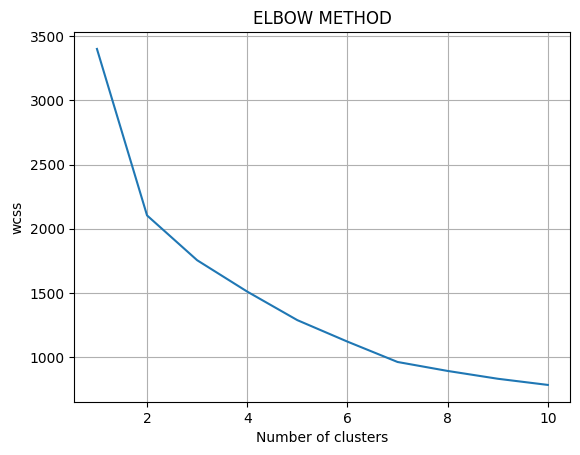

In [74]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss1)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.grid()
plt.title('ELBOW METHOD')
plt.show()
#visualise elbow point which indicates optimum number of clusters

In [75]:
km1 = KMeans(n_clusters=5, n_init =10)

In [76]:
km1.fit(pc_data1)
#fitting to given dataset

KMeans(n_clusters=5, n_init=10)

In [77]:
cluster_labels1=km1.predict(pc_data1)
#computes distance to each cluster centroid

In [78]:
cluster_labels1

array([2, 2, 2, 0, 0, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4,
       0, 1, 2, 2, 4, 4, 1, 0, 0, 4, 4, 0, 4, 2, 0, 2, 2, 0, 0, 0, 2, 1,
       2, 1, 1, 2, 1, 4, 4, 0, 2, 0, 4, 1, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 0, 0, 4, 0, 2, 0, 4, 1, 4, 4, 4, 2, 2, 4, 4, 0, 4, 0, 4, 0, 1,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 0, 4, 4, 2, 2, 2, 1, 4, 2, 0, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 2, 0, 0, 2, 4, 0, 4, 4, 4, 4, 4, 4, 2, 2, 4,
       4, 0, 0, 0, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 4, 4, 1, 2, 4, 2, 2, 2,
       4, 4, 1, 2, 1, 2, 4, 4, 4, 2, 1, 4, 2, 4, 2, 0, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 2, 2, 0, 4, 4, 2, 4, 0, 0, 2, 3, 3, 1, 1, 0, 3, 3, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       0, 4, 4, 0, 0, 4, 2, 4, 2, 0, 0, 0, 4, 0, 4, 0, 4, 4, 4, 2, 3, 4,
       3, 3, 2, 4, 2, 1, 2, 2, 1, 2, 1, 3, 4, 1, 0,

In [79]:
pd.Series(cluster_labels1).value_counts()
#count no of data points in each cluster

,count
4,145
2,101
0,73
3,72
1,37


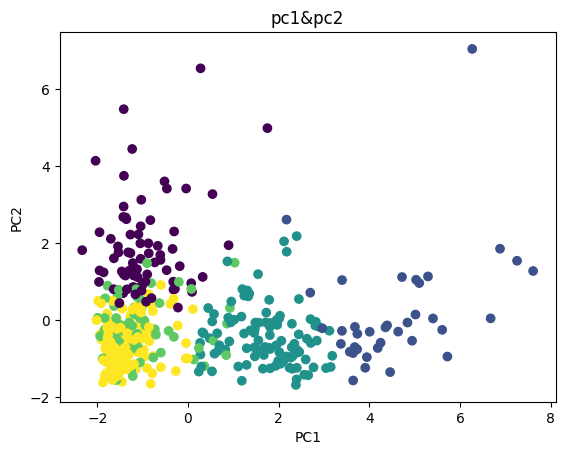

In [80]:
plt.scatter(pc_data1['PC1'],pc_data1['PC2'],c=cluster_labels1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('pc1&pc2')
plt.show()

In [81]:
cluster_indices1 = np.where(cluster_labels1 == 0)[0]

In [82]:
pc_data1['Cluster_labels1']=cluster_labels1

In [88]:
cluster_indices1

array([  3,   4,  22,  29,  30,  33,  36,  39,  40,  41,  51,  53,  67,
        68,  70,  72,  82,  84,  86,  97, 106, 112, 118, 119, 122, 133,
       134, 135, 142, 169, 181, 186, 187, 193, 230, 231, 249, 250, 264,
       267, 268, 273, 274, 275, 277, 279, 300, 301, 314, 317, 321, 322,
       326, 342, 344, 358, 359, 365, 368, 369, 370, 381, 389, 391, 392,
       394, 401, 410, 413, 415, 419, 423, 424])

In [83]:
pc_data1.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_labels1
0,1.236580,-0.350059,0.825646,0.280994,-0.432432,2
1,1.806897,-0.177002,0.701148,-0.011937,0.026449,2
2,2.175954,1.776971,0.961879,-2.326773,-1.312170,2
3,-1.003544,0.918055,0.455231,-0.017647,0.674654,0
4,0.896131,1.946014,0.960424,-0.472118,-0.882148,0


In [84]:
target_cluster_data1 = pc_data1[pc_data1['Cluster_labels1'] == 0]

In [85]:
target_cluster_data1

,PC1,PC2,PC3,PC4,PC5,Cluster_labels1
3,-1.003544,0.918055,0.455231,-0.017647,0.674654,0
4,0.896131,1.946014,0.960424,-0.472118,-0.882148,0
22,-1.029040,3.127247,0.523812,-0.098506,0.338843,0
29,-1.458849,1.264351,0.967249,1.969076,-1.263107,0
30,0.089947,0.732060,0.756257,-0.105366,-0.912536,0
...,...,...,...,...,...,...
413,-1.949774,2.284663,-0.098100,-0.723177,2.982277,0
415,-0.517025,3.604968,-0.061890,0.472680,2.645004,0
419,-1.316821,1.760626,-0.111165,-0.796706,2.825482,0
423,-0.040520,3.420345,0.055799,0.214550,2.001344,0


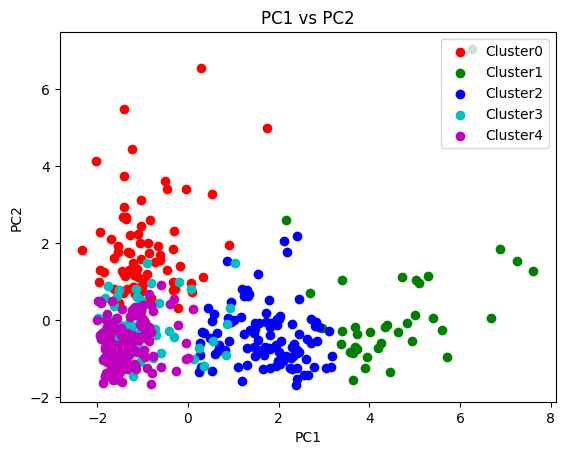

In [90]:
# Assuming you have assigned colors to each cluster
colors = ['r', 'g', 'b', 'c', 'm']  #  customizing the colors

for i in range(max(cluster_labels1)+1):
  cluster_data1 = pc_data1[cluster_labels1==i]
  plt.scatter(cluster_data1['PC1'],
              cluster_data1['PC2'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.legend()



In [91]:
#Silhouette score of kmeans clustering
silhouette_score1 = silhouette_score(pc_data1,cluster_labels1)
print(silhouette_score1)

0.41133235767564125


In [ ]:
#after principal component analysis,dimensionality reduced and silhopute score improved to 0.41 before it was 0.3

DBSCAN CLUSTERING ON PCA DATA

In [96]:

# Use adjusted parameters
dbscan1 = DBSCAN(eps=1.2, min_samples=5)  # Adjust eps and min_samples
cluster_labels1 = dbscan.fit_predict(pc_data1)

print(f"Unique cluster labels: {set(cluster_labels1)}")
print(f"Number of noise points: {(cluster_labels1 == -1).sum()}")


Unique cluster labels: {0, -1}
Number of noise points: 8


In [101]:
pc_data1_scaled = StandardScaler().fit_transform(pc_data1)

# Apply DBSCAN on scaled data
dbscan1 = DBSCAN(eps=1.2, min_samples=5)
cluster_labels1 = dbscan1.fit_predict(pc_data1_scaled)

print(f"Unique cluster labels: {set(cluster_labels1)}")
print(f"Number of noise points: {(cluster_labels1 == -1).sum()}")


Unique cluster labels: {0, 1, 2, 3, -1}
Number of noise points: 46


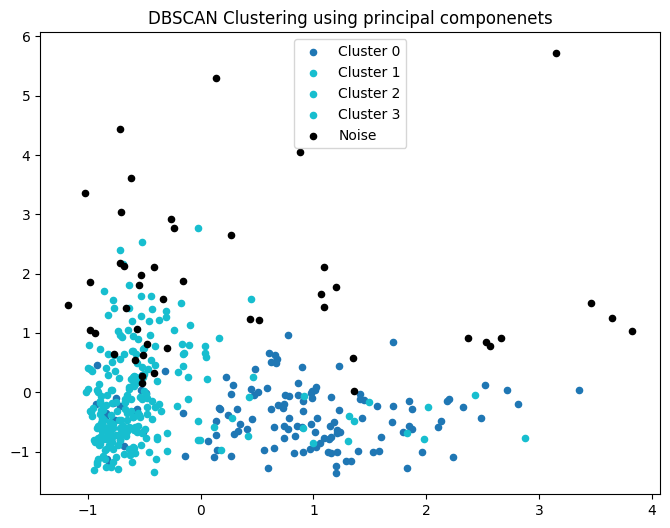

In [102]:
plt.figure(figsize=(8, 6))
unique_labels1 = set(cluster_labels1)

for label in unique_labels1:
    if label == -1:
        # Noise points
        color = "black"
        label_name = "Noise"
    else:
        # Assign color to each cluster
        color = plt.cm.tab10(label / max(unique_labels))
        label_name = f"Cluster {label}"

    plt.scatter(
        pc_data1_scaled[cluster_labels1 == label, 0],
        pc_data1_scaled[cluster_labels1 == label, 1],
        s=20,
        color=color,
        label=label_name
    )

plt.title("DBSCAN Clustering using principal componenets")
plt.legend()
plt.show()


In [ ]:
#number of noise points reduced compared to dbscan clustering on raw data